# Binary Classification: Logistic regression

In [4]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# A simple dataset

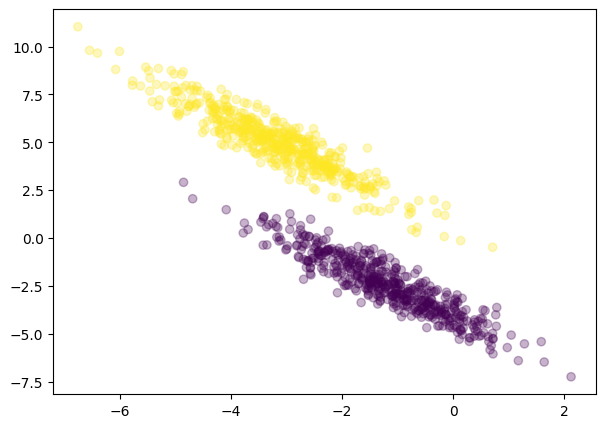

In [5]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# create a random dataset
N_SAMPLES = 1000
N_CENTERS = 2
X, y = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, 
                  cluster_std=1.5, random_state=66)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

# plot
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.3);

# (Linear) Logistic Regression Classifier

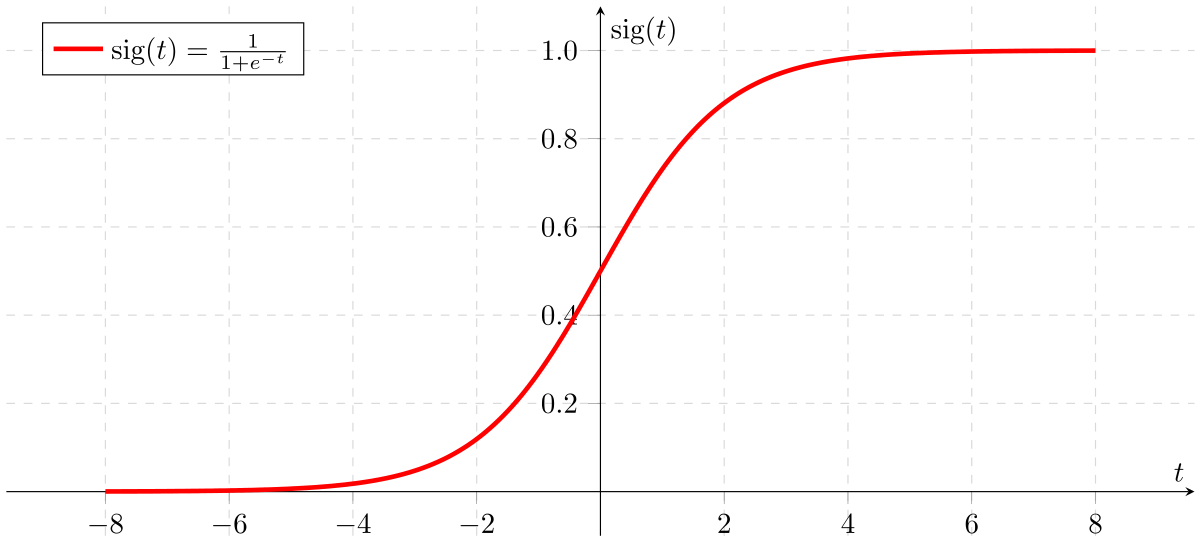

 - see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

A naive explanation would be as follows:

 - we know how to do linear regression: $z = \mathbf{w}^T\mathbf{x} + b$
 - but we need to bound $z$ into the interval $[0,1]$ to interpret $z$ as a probability of class 1 (vs. class 0)
 - therefore we are interested in $$P(y=1|\mathbf{x}) = sig (-z) = \frac{1}{1+e^{-z}}$$
 - now let's compute $$\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})} = $$
   $$\frac{P(y=1|\mathbf{x})}{P(y=0|\mathbf{x})} = \frac{\frac{1}{1+e^{-z}}}{1-\frac{1}{1+e^{-z}}} =$$
   $$\frac{\frac{1}{1+e^{-z}}}{\frac{1+e^{-z}-1}{1+e^{-z}}} = \frac{\frac{1}{1+e^{-z}}}{\frac{e^{-z}}{1+e^{-z}}} = \frac{1}{e^{-z}} = e^{z}$$

   $$\frac{P(y=1|\mathbf{x})}{P(y=0|\mathbf{x})} = e^{z}$$

   or

   $$\ln\left( \frac{P(y=1|\mathbf{x})}{P(y=0|\mathbf{x})} \right)= z = \mathbf{w}^T\mathbf{x} + b$$

- The term in the log is named "odds": probability of event divided by probability of no event.

- Logistic regression is a linear regression on the log-odds

   

Accuracy: 1.0


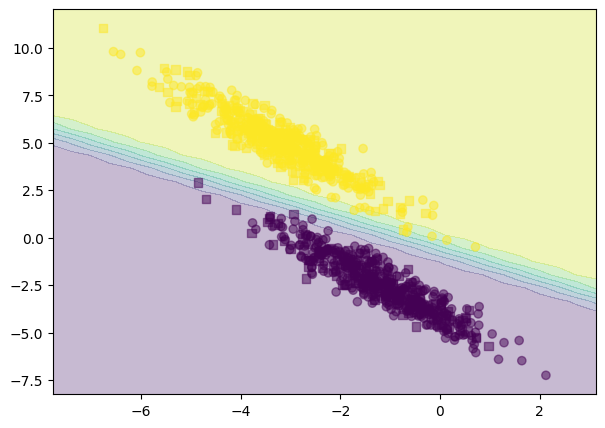

In [32]:
X, y = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, 
                  cluster_std=1.5, random_state=66)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )

from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots(figsize=(7,5))
disp = DecisionBoundaryDisplay.from_estimator(
    lr, X, response_method = "predict_proba", 
    grid_resolution = 30,
    alpha=0.3, ax = ax)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', alpha=0.5);



# Supervised Learning: SVM

In [8]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

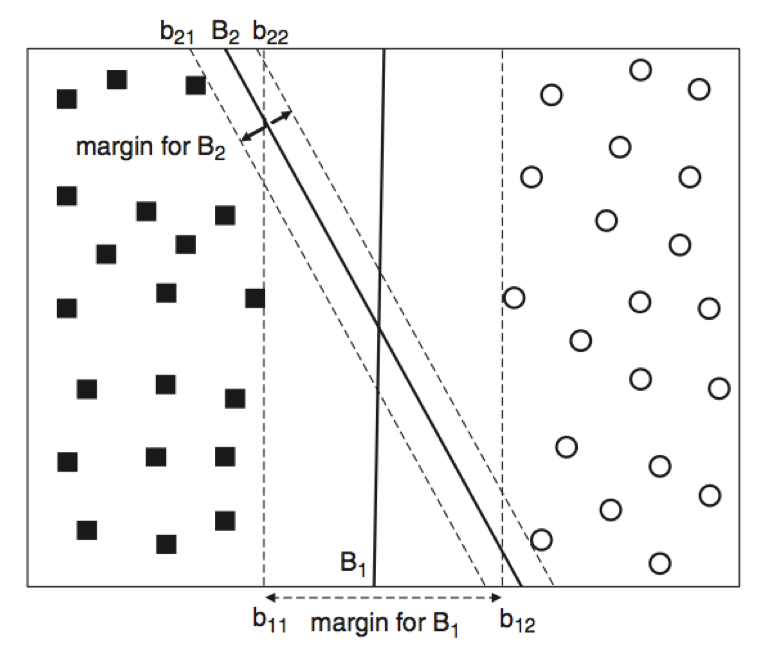

Classification technique, aiming at maximizing the generalization power of its classification model.


Given a set of (positive/negative) points in a 2D space, what is the line that best "separates" them?

We call **margin** the distance between closest instances of opposite classes along the  perpendicular direction to the selected decision boundary.

The smaller the margin, the larger the **misclassification risk**.

The instances determining the margin are named **support vectors**.


## SVM linear decision boundary

Let's assume labels are such that $y_i \in \{-1,1\}$.

A linear decision boundary is $B$:
 - $w^Tx + b = 0$

where $w$ weighs the features of $x$.

For objects "above" $B$:
 - $w^Tx + b = k'$, with $k'>0$

For objects "below" B:
 - $w^Tx + b = k''$, with $k''<0$

$k'$ and $k''$ are proportional to the
 distances from the decision boundary.

Let $x_s$ and $x_c$ be the closest objects of the two classes,
 we can rescale $x$, $w$ and $b$ such that:
 - $w^Tx_s + b = 1$     and     
 - $w^T x_c + b = -1$

By definition, the distances $d_s$ and $d_c$ of $x_s$ and $x_c$ from $w^Tx + b$ are:
 - $ds=|w^Tx_s + b|/\|w\|_2=1/\|w\|_2$ and 
 - $dc =|w^Tx_c + b|/\|w\|_2=1/\|w\|_2$

Therefore the margin is $d = d_s+d_c= 2/\|w\|_2$

To maximize the margin $d$, we should minimize $\|w\|_2$.

This is very interesting! To maximize the margin, we should "simplify" $w$.

Let $y_i\in\{+1,-1\}$ be the class of the $i$-th instance,
the (linear) SVM (binary) classification problem is:


Minimize:       $\|w\|_2 / 2$

Subject to:  $y_i (w^T x_i + b) \geq 1$

  or: $y_i (w^T x_i + b) -1 \geq 0$
  ${}_{}$


Since the objective function is quadratic, and the constrains are linear in $w$ and $b$, this is know to be a convex optimization problem.


### Soft margin


 - What if a decision boundary has a large margin and a small error rate ?
 - What if there is not an error-free decision boundary ?
    - Non-linearly separable classes.

We need to relax the previous constraints, introducing slack variables $\xi_i \geq 0$

Minimize:       $\|w\|_2 / 2 + C \sum \xi_i$

Subject to:  $y_i (w^T x_i + b) \geq 1 - \xi_i$, $\xi_i\geq 0$  
${}_{}$


At the same time, this relaxation must be minimized.
$C$ defines the trade-off between training error and large margin.
The parameter C (C>0) relates to the hardness of the margins.
A large value of C pays more emphasis on minimizing the training error than maximizing the margin.


# Linear Support Vector Classifier

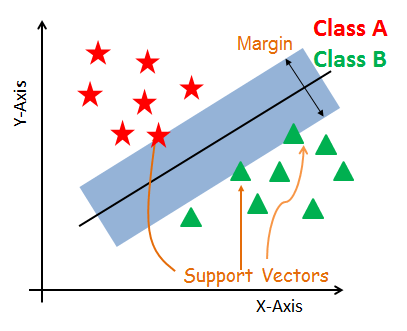

See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

Accuracy: 0.994


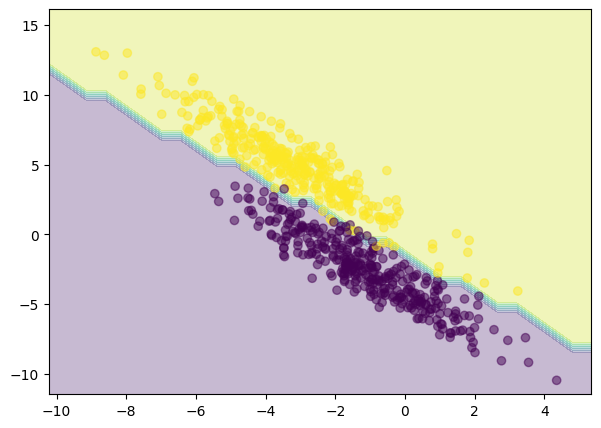

In [39]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a random dataset
N_SAMPLES = 1000
N_CENTERS = 2
X, y = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, 
                  cluster_std=2.5, random_state=66)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

from sklearn.svm import LinearSVC
model = LinearSVC(C=100, max_iter=100000)
#
# A large value of C pays more emphasis on 
# minimizing the training error than maximizing the margin.
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print ("Accuracy: {:.3f}".format( accuracy_score(y_true=y_test, 
                                                 y_pred=y_pred) ) )

from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots(figsize=(7,5))
disp = DecisionBoundaryDisplay.from_estimator(
    model, X, response_method = "predict", 
    grid_resolution = 30,
    alpha=0.3, ax = ax)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5);
#ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', alpha=0.5);



# Non Linearly-separable problems

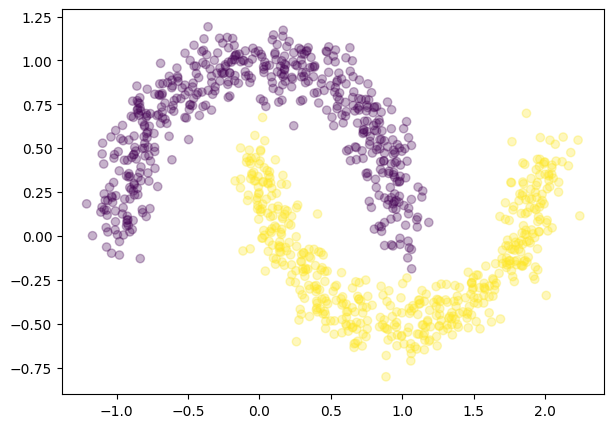

In [10]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# create a random dataset
N_SAMPLES = 1000
X, y = make_moons(n_samples=N_SAMPLES, noise=0.1)

# plot
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.3);

Accuracy: 0.867


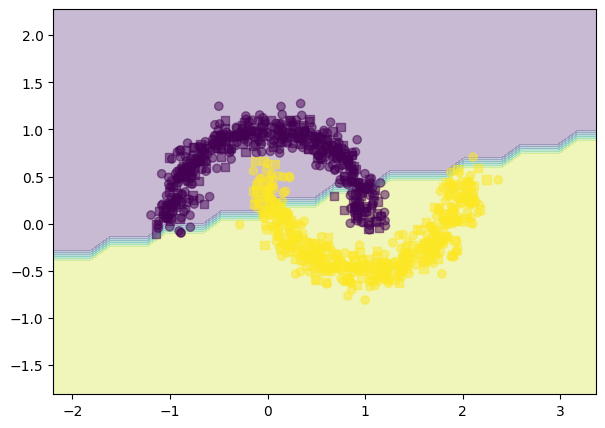

In [40]:
X, y = make_moons(n_samples=N_SAMPLES, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print ("Accuracy: {:.3f}".format( accuracy_score(y_true=y_test, 
                                                 y_pred=y_pred) ) )
from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots(figsize=(7,5))
disp = DecisionBoundaryDisplay.from_estimator(
    model, X, response_method = "predict", 
    grid_resolution = 30,
    alpha=0.3, ax = ax)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5);
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', alpha=0.5)



# Non-Linear Support Vector Classifier

 - see: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

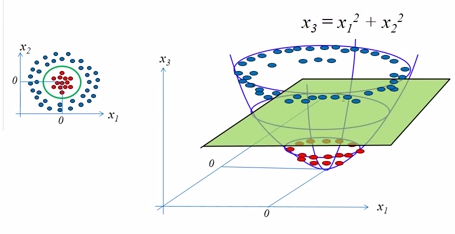

Accuracy: 0.997


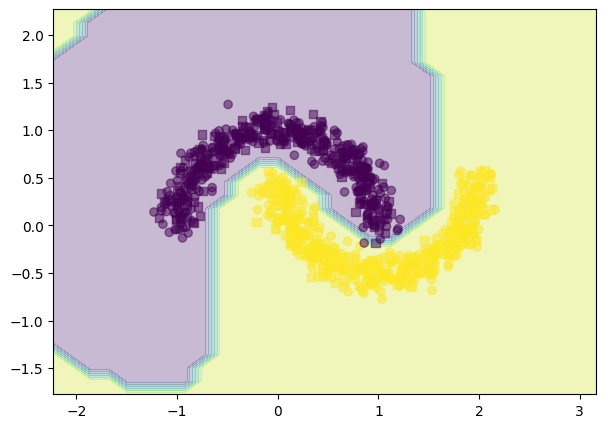

In [42]:
X, y = make_moons(n_samples=N_SAMPLES, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

from sklearn.svm import SVC

model = SVC(C=1) # try 100, 0.01
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print ("Accuracy: {:.3f}".format( accuracy_score(y_true=y_test, 
                                                 y_pred=y_pred) ) )


from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots(figsize=(7,5))
disp = DecisionBoundaryDisplay.from_estimator(
    model, X, response_method = "predict", 
    grid_resolution = 30,
    alpha=0.3, ax = ax)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5);
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', alpha=0.5);



Accuracy: 0.982


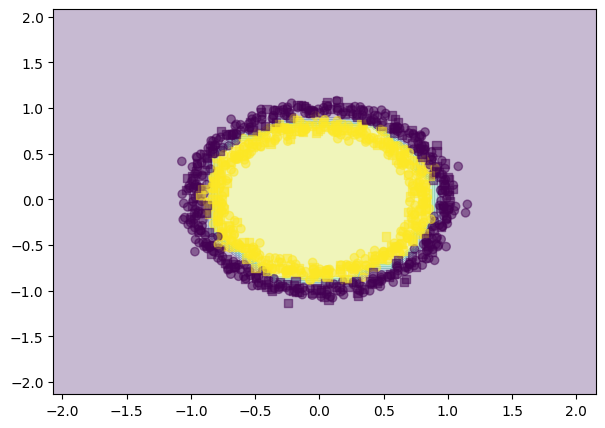

In [43]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=N_SAMPLES, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

from sklearn.svm import SVC

model = SVC(C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print ("Accuracy: {:.3f}".format( accuracy_score(y_true=y_test, 
                                                 y_pred=y_pred) ) )

from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots(figsize=(7,5))
disp = DecisionBoundaryDisplay.from_estimator(
    model, X, response_method = "predict", 
    grid_resolution = 30,
    alpha=0.3, ax = ax)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5);
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', alpha=0.5);


## Remarks

 - SVM (scikit learn SCV classifier) is a very powerful machine learning tool
 - SVM aims at maximizing the margin
   - less probability of misclassification errors at test time
   - better generalization power
 - SVM still search for a linear model but in a high dimensional feature space
   - the function mapping objects in the high dimensional feature space is called kernel

## Let's try with a mode complex dataset

In [14]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [15]:
print (data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
X = data.data
y = data.target

print (X.shape)
print (y.shape)
print (data.target_names)

(569, 30)
(569,)
['malignant' 'benign']


In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

for c in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    # train and predict
    model = SVC(C=c)
    model.fit(X_train, y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, 
                               y_pred = model.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test, 
                               y_pred = model.predict(X_test))
    print ("C: {:8.3f} - Train Accuracy: {:.3f} - Test Accuracy: {:.3f}"
           .format( c, train_acc, test_acc) )

C:    0.001 - Train Accuracy: 0.629 - Test Accuracy: 0.623
C:    0.010 - Train Accuracy: 0.789 - Test Accuracy: 0.772
C:    0.100 - Train Accuracy: 0.877 - Test Accuracy: 0.939
C:    1.000 - Train Accuracy: 0.914 - Test Accuracy: 0.947
C:   10.000 - Train Accuracy: 0.916 - Test Accuracy: 0.947
C:  100.000 - Train Accuracy: 0.930 - Test Accuracy: 0.982
C: 1000.000 - Train Accuracy: 0.956 - Test Accuracy: 0.956


## Never touch the test set !!!!

We should never make decision on the basis of the test set!

Test set contains *future* instances not available at training time.

## Validation Set

Never touch the test set!

Train can be further split to simulate an unseen test set on which we can tune/validate the algorithm's hyper-parameters.

A split in 60/20/20 into train/validation/test is typical.

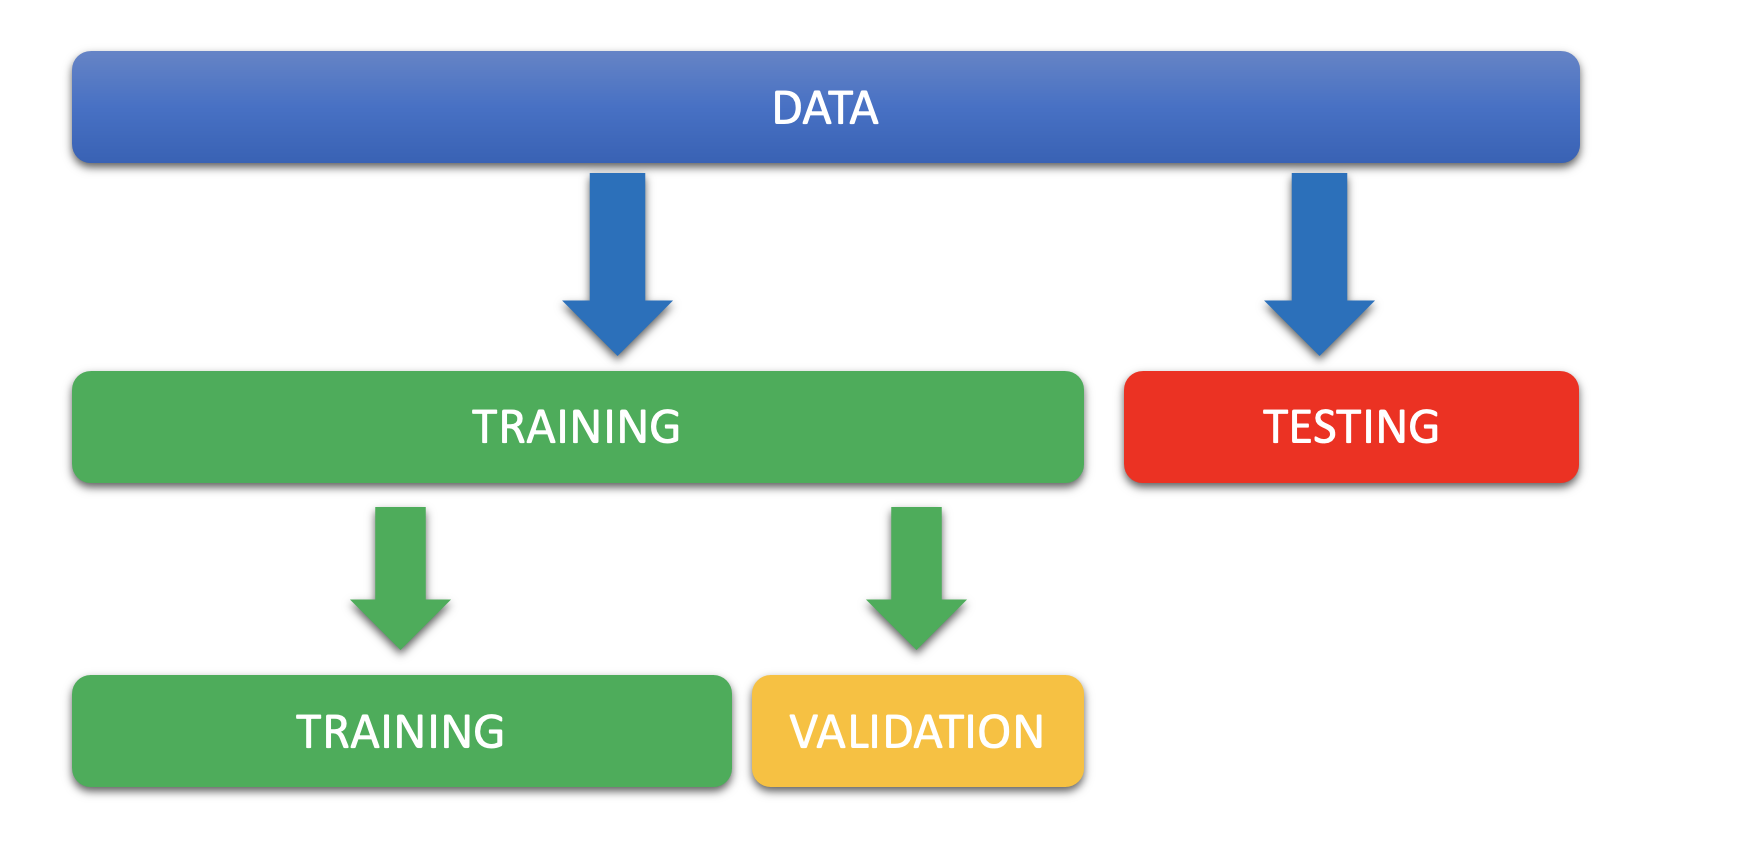

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, 
                                                         test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, 
                                                       test_size=0.25, random_state=42)

accuracies = []

for c in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    # train and predict
    model = SVC(C=c)
    model.fit(X_train, y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, 
                               y_pred = model.predict(X_train))
    valid_acc = accuracy_score(y_true = y_valid, 
                               y_pred = model.predict(X_valid))
    print ("C: {:8.3f} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f}"
           .format( c, train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, c] ]

best_accuracy, best_c = max(accuracies)
print ( "Best C:", best_c )

# here we are using both training and validation,
# to exploit the most data
model = SVC(C=best_c)
model.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true = y_test, 
                          y_pred = model.predict(X_test) )
print ("Test Accuracy: {:.3f}".format(test_acc) )

C:    0.001 - Train Accuracy: 0.633 - Validation Accuracy: 0.614
C:    0.010 - Train Accuracy: 0.633 - Validation Accuracy: 0.614
C:    0.100 - Train Accuracy: 0.874 - Validation Accuracy: 0.877
C:    1.000 - Train Accuracy: 0.912 - Validation Accuracy: 0.921
C:   10.000 - Train Accuracy: 0.912 - Validation Accuracy: 0.930
C:  100.000 - Train Accuracy: 0.918 - Validation Accuracy: 0.947
C: 1000.000 - Train Accuracy: 0.956 - Validation Accuracy: 0.947
Best C: 1000.0
Test Accuracy: 0.956


## k-fold Cross-validation

Also, some specific values in the validation set may affect the model performance and hyper parameter choices.


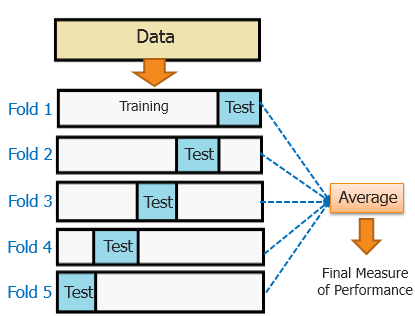

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)

accuracies = []

for c in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    # train and predict
    model = SVC(C=c)
    # model.fit(X_train, y_train)

    scores = cross_val_score(model, X_train_80, y_train_80, 
                         cv=5, scoring='accuracy', 
                         verbose = 0)
    
    print (scores)
    valid_acc = scores.mean()
    print ("C: {:8.3f} - Validation Accuracy: {:.3f}"
           .format( c, valid_acc) )
    
    accuracies += [ [valid_acc, c] ]

best_accuracy, best_c = max(accuracies)
print ( "Best C:", best_c )

# here we are using both training and validation,
# to exploit the most data
model = SVC(C=best_c)
model.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true = y_test, 
                          y_pred = model.predict(X_test) )
print ("Test Accuracy: {:.3f}".format(test_acc) )

[0.63736264 0.62637363 0.62637363 0.62637363 0.62637363]
C:    0.001 - Validation Accuracy: 0.629
[0.73626374 0.71428571 0.65934066 0.69230769 0.69230769]
C:    0.010 - Validation Accuracy: 0.699
[0.87912088 0.84615385 0.94505495 0.83516484 0.85714286]
C:    0.100 - Validation Accuracy: 0.873
[0.92307692 0.87912088 0.96703297 0.86813187 0.87912088]
C:    1.000 - Validation Accuracy: 0.903
[0.97802198 0.87912088 0.95604396 0.85714286 0.9010989 ]
C:   10.000 - Validation Accuracy: 0.914
[0.98901099 0.87912088 0.95604396 0.89010989 0.91208791]
C:  100.000 - Validation Accuracy: 0.925
[0.97802198 0.93406593 0.96703297 0.94505495 0.91208791]
C: 1000.000 - Validation Accuracy: 0.947
Best C: 1000.0
Test Accuracy: 0.956


## Stratified sampling

In general our results might be biased by a specific choice of the validation set. This is more true with imbalanced datasets.


By default, scikit-learn employs stratified sampling during cross validation. This means that the frequencies of the different classes are preserved.

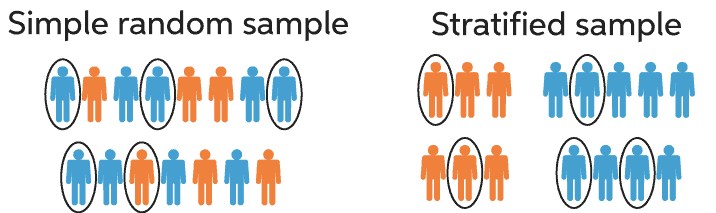

# Automatic parameter tuning

 - see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
 - see https://scikit-learn.org/stable/modules/grid_search.html

In [21]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = SVC()
parameters = { 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
                #,
                # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }
tuned_model = GridSearchCV(model, parameters, cv=5, verbose=0)
tuned_model.fit(X_train_80, y_train_80)

print ("Best Score: {:.3f}".format(tuned_model.best_score_) )
print ("Best Params: ", tuned_model.best_params_)

Best Score: 0.947
Best Params:  {'C': 1000.0}


In [22]:
tuned_model.cv_results_

{'mean_fit_time': array([0.00666075, 0.00600681, 0.00407982, 0.003089  , 0.00263023,
        0.00284381, 0.0035295 ]),
 'std_fit_time': array([0.00107661, 0.00043772, 0.00047205, 0.00046266, 0.00043267,
        0.00055387, 0.00047365]),
 'mean_score_time': array([0.00362644, 0.00343833, 0.00222282, 0.00183921, 0.00140305,
        0.00129395, 0.00124335]),
 'std_score_time': array([0.00048025, 0.00035396, 0.00023441, 0.00030359, 0.00031028,
        0.00018899, 0.00023994]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0},
  {'C': 1000.0}],
 'split0_test_score': array([0.63736264, 0.73626374, 0.87912088, 0.92307692, 0.97802198,
        0.98901099, 0.97802198]),
 'split1_test_score': array([0.62637363, 0.71428571, 0.84615385, 0.87912088, 0.8791

In [23]:
pd.DataFrame( tuned_model.cv_results_ )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006661,0.001077,0.003626,0.000480,0.001,{'C': 0.001},0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,7
1,0.006007,0.000438,0.003438,0.000354,0.01,{'C': 0.01},0.736264,0.714286,0.659341,0.692308,0.692308,0.698901,0.025631,6
2,0.004080,0.000472,0.002223,0.000234,0.1,{'C': 0.1},0.879121,0.846154,0.945055,0.835165,0.857143,0.872527,0.039069,5
3,0.003089,0.000463,0.001839,0.000304,1.0,{'C': 1.0},0.923077,0.879121,0.967033,0.868132,0.879121,0.903297,0.037038,4
4,0.002630,0.000433,0.001403,0.000310,10.0,{'C': 10.0},0.978022,0.879121,0.956044,0.857143,0.901099,0.914286,0.045786,3
5,0.002844,0.000554,0.001294,0.000189,100.0,{'C': 100.0},0.989011,0.879121,0.956044,0.890110,0.912088,0.925275,0.041351,2
6,0.003530,0.000474,0.001243,0.000240,1000.0,{'C': 1000.0},0.978022,0.934066,0.967033,0.945055,0.912088,0.947253,0.023466,1


In [24]:
test_acc = accuracy_score(y_true = y_test, 
                          y_pred = tuned_model.predict(X_test) )
print ("Test Accuracy: {:.3f}".format(test_acc) )

Test Accuracy: 0.956


## References

- **Python Data Science Handbook**. O’Reilly. 2016
  - Chapter 5: Machine Learning - In Depth: Support Vector Machines
  - Chapter 5: Machine Learning - Hyperparameters and Model Validation